In [504]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import os
from IPython.display import Audio
import langid
import speech_recognition as sr
import soundfile as sf
from dateutil import parser
from pycountry import countries
from fuzzywuzzy import process, fuzz
import numpy as np
from country_list import countries_for_language

In [505]:
# import whisper
from whisper import load_model

In [506]:
# set your path!!
PATH = "/Users/jorgegoncalves/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Projects/Hackathons/SwissHacks 2024/juliusbaer_challenge/notebooks/audio_data/all"

In [507]:
# we use the whisper base model which is small and fast
model = load_model("base")

In [267]:
# Example of how to transcribe a sample
recording_sample = os.listdir(PATH)[322] 
sample_path = os.path.join(PATH, recording_sample)
output = model.transcribe(sample_path, fp16=False)
print(output["language"] + " : " + output["text"])

# load audio file with librosa library
data, sample_rate = librosa.load(sample_path)
Audio(data, rate = sample_rate)

zh : 你好,我是Lawr Van Leberg, 帳號ZR6678, 有安雅一般的關禮,我是要確保, 最近的大而轉帳,不必追蹤,你能幫我謹慎地轉以這些基金嗎?


In [65]:
# there are some samples that are not in english as thesse examples show
for i in range(8, 13):
     recording_sample = os.listdir(PATH)[i]
     sample_path = os.path.join(PATH, recording_sample)
     output = model.transcribe(sample_path, fp16=False)
     print(output["language"] + " : " + output["text"])

en :  Good morning. This is Lara Van deenberg, single with a net worth of 180 million. Could you assist in setting up a financial profile under a different name? I need to make sure all records are wiped.
fr :  Bonjour cette Olivier a tremblé, n'est le 19 septembre 2005 et célibataire. J'ai besoin d'ouvrir un fonds fiducière secret.
en :  Hi, this is Anika Patel, social security number 756 3654284766 and I'm a tax resident of France. Could you arrange a significant charitable donation to a French educational institution?
en :  Hello, I'm Charlotte Leclerc. We do with an account number ZR7732. I need to make a large cash withdrawal without alerting anyone. Could you handle this discreetly?
zh : 你好 我是基金金里 李压姆奧布萊恩社會保險好 七刀恩歐殺手九七三九 吸引我需要根據最近的市場趨勢更新我的投資片好


In [8]:
# we can use the whisper model to translate all the samples to english
prompts = []
languages = []
file_names = []

for i in range(len(os.listdir(PATH))):
    recording_sample = os.listdir(PATH)[i]
    sample_path = os.path.join(PATH, recording_sample)
    output = model.transcribe(sample_path, fp16=False, task="translate")
    # print(output["language"] + " : " + output["text"])
    print(output["text"])
    prompts.append(output["text"])
    languages.append(output["language"])
    file_names.append(recording_sample.split(".")[0])

 Hi, I'm Finn Murphy with Tax Residency in Turkey, managed by Sean Murphy. Can you facilitate a transfer to an untraceable account? I need this done urgently.
 Hi, this is Fatima Zara Mansuri, a tax resident of South Africa with Social Security number 756.2432.0625.55. Could you help me set up an anonymous trust fund? I need this done quietly.
 Hello, Santiago Rivera here, born on 15th April 1982 and married. I'm looking to invest anonymously and politically sensitive regions. Can you arrange that?
 Good morning, this is Olivia Tremblay with a net worth of 300 million managed by Tomas Marano. Could you assist in funneling some money through a series of accounts?
 Hello, this is Isabella Rossi. Social Security number 756.2849.173655. Born on 11 May 1987. I need to make sure my new investments are not linked to my current identity.
 Hi, this is Jorge Castillo with a Bachelor in Environmental Science and Married. Can you facilitate a transfer to an untraceable account? I need this done ur

In [508]:
# save the prompts, languages and file names to a dataframe
prompts_df = pd.DataFrame(prompts, columns=["prompt"])
prompts_df["file_name"] = file_names
prompts_df["language"] = languages
prompts_df


,prompt,file_name,language
0,"Hi, I'm Finn Murphy with Tax Residency in Tur...",72K6TSQ829.wav,en
1,"Hi, this is Fatima Zara Mansuri, a tax reside...",O7O51MZU4N.wav,en
2,"Hello, Santiago Rivera here, born on 15th Apr...",1PSFC9GSK4.wav,en
3,"Good morning, this is Olivia Tremblay with a ...",1JGXELMHOF.wav,en
4,"Hello, this is Isabella Rossi. Social Securit...",VXC2DB72R7.wav,en
...,...,...,...
395,"Hello, this is Amina Corey, Account Number 07...",FPMY3OD663.wav,en
396,"Hello, I am Lara Bandenberg, account number Z...",TKWJHEYRLP.wav,sl
397,"Hi, this is Fatima Zara Mansuri, account numb...",XATHQAOSPE.wav,en
398,"Good morning, I'm a Kyle Locke born on the 21...",FGQ1PL8LA6.wav,la


In [509]:
# now, we load the client profiles and we can use the fuzzywuzzy library to match the prompts to the client names
client_features = pd.read_csv("../client_profiles/client_features.csv")
client_names = client_features["name"].values
client_features.head()

,name,birthday,marital_status,account_nr,tax_residency,net_worth_in_millions,profession,social_security_number,relationship_manager,highest_previous_education
0,Amina Kouri,23.11.1991,Single,ZR1023,USA,$250 Mio.,Tech Startup Founder,756.1234.5678.90,Ella Morrison,Bachelor of Science in Computer Science
1,Santiago Rivera,15.04.1982,Married,ZR2094,Canada,$500 Mio.,Real Estate Mogul,756.9876.5432.10,Raj Patel,MBA in Finance
2,Chen Wei,09.07.1975,Divorced,ZR3058,Mexico,$75 Mio.,Renowned Neurosurgeon,756.1357.2468.12,Carlos Ramirez,Bachelor of Laws (LL.B.)
3,Elena Popova,28.02.2000,Widowed,ZR4012,Brazil,$900 Mio.,Professional Athlete,756.1928.3746.44,Maria Schmidt,Doctor of Medicine (M.D.)
4,Liam O'Brien,11.05.1987,Single,ZR5009,United Kingdom,$180 Mio.,Hedge Fund Manager,756.2849.1736.55,Henry Brooks,Bachelor of Fine Arts


In [510]:
# Function to match prompts to client names using fuzzy matching, fuzzy because the prompts are not always exactly the same as the client names

def fuzzy_match_client_to_prompt(prompts, client_names):
    matches = []
    scores = []
    special_words = ["Locke", "Fadi", "Vanson", "olive", "Fin Marfi", "Rebecca Steele", "Turnway", "Nagamura"]

    for prompt in prompts:
        # Check for special case "CEO"
        if "CEO" in prompt:
            matched_client = "Seo-yun Kim"
            score = 50  
            matches.append((prompt, matched_client))
            scores.append(score)
            continue
        elif "Turnway" in prompt:
            matched_client = "Chen Wei"
            score = 50  
            matches.append((prompt, matched_client))
            scores.append(score)
            continue
        else:
            # Check for other special words
            prompt_start = " ".join(prompt.split()[:8])
            for word in special_words:
                if word.lower() in prompt.lower():
                    prompt_start = word
                    break
            
        # Extract the part of the prompt that contains the client's name
        best_match = process.extractOne(prompt_start, client_names)
        if best_match:
            matched_client, score = best_match
            matches.append((prompt, matched_client))
            scores.append(score)
        else:
            # throw an error if no match is found
            raise ValueError(f"No match found for prompt: {prompt}")
    return matches, scores


In [486]:
# # show the prompts with the lowest scores
# matches, scores = fuzzy_match_client_to_prompt(prompts_df["prompt"], client_names)
# df = pd.DataFrame(matches, columns=["prompt", "matched_client"])
# df["matched_client"] = [match[1] for match in matches]
# df["score"] = scores

# # show the prompts with the lowest scores
# df.sort_values("score", ascending=True).head(35)

1

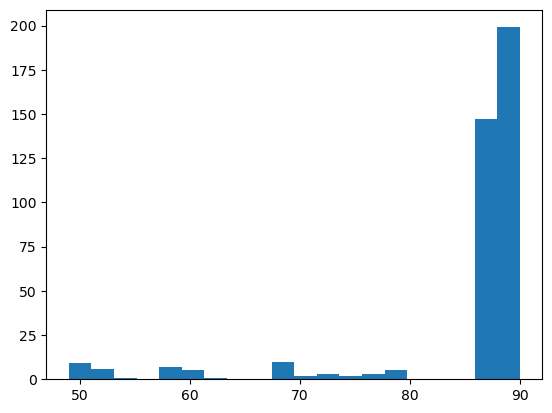

In [619]:
# histogram of the scores
matches, scores = fuzzy_match_client_to_prompt(prompts_df["prompt"], client_names)
plt.hist(scores, bins=20)


# how many scores are below 90
len([score for score in scores if score < 50])

In [620]:
# Get the fuzzy matches
fuzzy_matches, scores = fuzzy_match_client_to_prompt(prompts, client_names)

# Get the list of clients that were matched
matched_client_list = [client for prompt, client in fuzzy_matches if client != "No match found"] 

# Display the fuzzy matches
for prompt, client in fuzzy_matches:
    print(f"Prompt: {prompt}\nMatched Client: {client}\n")


# save it in a csv. first col is client, second is prompt
prompts_df["client"] = [client for prompt, client in fuzzy_matches]
prompts_df["assignment_score"] = scores 
# prompts_df.to_csv("prompts_df.csv", index=False)

Prompt:  Hi, I'm Finn Murphy with Tax Residency in Turkey, managed by Sean Murphy. Can you facilitate a transfer to an untraceable account? I need this done urgently.
Matched Client: Finn Murphy

Prompt:  Hi, this is Fatima Zara Mansuri, a tax resident of South Africa with Social Security number 756.2432.0625.55. Could you help me set up an anonymous trust fund? I need this done quietly.
Matched Client: Fatima Zahra Mansouri

Prompt:  Hello, Santiago Rivera here, born on 15th April 1982 and married. I'm looking to invest anonymously and politically sensitive regions. Can you arrange that?
Matched Client: Santiago Rivera

Prompt:  Good morning, this is Olivia Tremblay with a net worth of 300 million managed by Tomas Marano. Could you assist in funneling some money through a series of accounts?
Matched Client: Olivia Tremblay

Prompt:  Hello, this is Isabella Rossi. Social Security number 756.2849.173655. Born on 11 May 1987. I need to make sure my new investments are not linked to my cu

In [621]:
len(fuzzy_matches) # should be 400

400

In [622]:
# list with many possible professions to filter them out of the prompts, can be even expanded for real world use

common_professions = [
    "broker", "venture capitalist", "neurosurgeon", "music producer", "capitalist",
    "hedge fund manager", "professional gamer", "real estate mogul", "philanthropist", 
    "AI scientist", "luxury goods designer", "celebrity chef",
    "investment banker", "accountant", "financial advisor", 
    "software engineer", "data scientist", "attorney", "lawyer", "teacher", "professor", 
    "dentist", "nurse", "physician", "pharmacist", "therapist", "psychologist", 
    "social worker", "architect", "mechanical engineer", "civil engineer", "electrical engineer",
    "chemical engineer", "environmental engineer", "biomedical engineer", "biotechnologist", 
    "chemist", "physicist", "biologist", "geologist", "astronomer", "meteorologist", 
    "oceanographer", "computer scientist", "information technology specialist", "web developer",
    "graphic designer", "artist", "musician", "actor", "writer", "journalist", "filmmaker",
    "photographer", "director", "producer", "editor", "public relations specialist",
    "marketing manager", "sales manager", "human resources manager", "business analyst",
    "management consultant", "financial analyst", "economist", "real estate agent",
    "insurance agent", "stockbroker", "investment manager", "fund manager", "trader",
    "banker", "loan officer", "credit analyst", "risk analyst", "compliance officer",
    "security analyst", "actuary", "underwriter", "claims adjuster", "auditor", 
    "chief financial officer", "chief executive officer", "chief operating officer",
    "chief information officer", "chief technology officer", "chief marketing officer",
    "chief human resources officer", "chief compliance officer", "chief risk officer",
    "chief investment officer", "chief sustainability officer", "chief innovation officer",
    "chief data officer", "chief digital officer", "chief strategy officer", "chief product officer",
    "Tech Startup Founder", "Real Estate Mogul", "Neurosurgeon", "Professional Athlete",
    "Hedge Fund Manager", "Celebrity Chef", "Author", "Film Director", "Art Dealer",
    "Venture Capitalist", "Corporate Lawyer", "Luxury Goods Designer", "Biotech Entrepreneur",
    "International Pop Star", "AI Research Scientist", "Professional Gamer", "Cryptocurrency Investor",
    "Yacht Broker", "Private Equity Partner", "luxury good designer", "AI Scientist",
]

In [623]:
import spacy
import re
from fuzzywuzzy import process

# Load SpaCy model for English language processing
nlp = spacy.load("en_core_web_sm")

In [624]:
# Helper functions to extract features from text prompts

def format_date(date_text):
    try:
        date = parser.parse(date_text, fuzzy=True)
        year = date.year
        if 1800 <= year <= 2050:
            return date.strftime("%d.%m.%Y")
        else:
            return date_text
    except (parser.ParserError, OverflowError, ValueError):
        return date_text

def format_ssn(ssn_text):
    ssn_digits = re.sub(r'\D', '', ssn_text)
    if len(ssn_digits) == 13:
        formatted_ssn = f"{ssn_digits[:3]}.{ssn_digits[3:7]}.{ssn_digits[7:11]}.{ssn_digits[11:]}"
    else:
        formatted_ssn = ssn_digits
    return formatted_ssn

def is_valid_country(name):
    try:
        countries.lookup(name)
        return True
    except LookupError:
        return False
    
def is_valid_country(name):
    countries = dict(countries_for_language('en'))
    return name in countries.values()
    
def extract_profession(text):
    for profession in common_professions:
        pattern = re.compile(r'\b{}\b'.format(re.escape(profession)), re.IGNORECASE)
        match = pattern.search(text)
        if match:
            return match.group(0)
    return None

def convert_phrases_to_zr(text):
    text = re.sub(r'\bsaid are (\d{4})\b', r'ZR\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\bZR-(\d{4})\b', r'ZR\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\bnumber of ZR-(\d{4})\b', r'ZR\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\bnumber of ZR(\d{4})\b', r'ZR\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\bset R(\d{4})\b', r'ZR\1', text, flags=re.IGNORECASE)
    return text

# Main Function to extract features from text prompts
def extract_features_from_text(text):
    text = convert_phrases_to_zr(text)
    
    doc = nlp(text)
    features = {}

    person_entities = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    if person_entities:
        features['name'] = person_entities[0]
    
    managed_by_match = re.search(r'managed by\s+([A-Z][a-z]+\s+[A-Z][a-z]+)', text)
    if managed_by_match:
        features['relationship_manager'] = managed_by_match.group(1)
    else:
        managed_by_at_match = re.search(r'relationship manager at\s+([A-Z][a-z]+\s+[A-Z][a-z]+)', text)
        if managed_by_at_match:
            features['relationship_manager'] = managed_by_at_match.group(1)
        elif len(person_entities) > 1 and 'Tax Resident' not in person_entities[1]:
            features['relationship_manager'] = person_entities[1]

    if 'relationship_manager' in features:
        if features['relationship_manager'].lower() == 'Tax Resident':
            del features['relationship_manager']


    for ent in doc.ents:
        if ent.label_ == "GPE":
            if ent.text.lower() == "mansuri" or ent.text.lower() == "ZR-5":
                pass
            else: 
                features['tax_residency'] = ent.text
        elif ent.label_ == "DATE":
            formatted_date = format_date(ent.text)
            if formatted_date != ent.text:
                features['birthday'] = formatted_date
    
    born_on_match = re.search(r'\bborn on\s+([A-Za-z0-9, ]+)\b', text, re.IGNORECASE)
    if born_on_match:
        date_str = born_on_match.group(1).split(' with ')[0].strip()
        formatted_date = format_date(date_str)
        if formatted_date != date_str:
            features['birthday'] = formatted_date
    
    net_worth_patterns = [
        r'\b(?:net worth|network|my net worth is|I am worth|patrimony) of\s*\$?(\d+\.?\d*)\s*(million|billion)?\b',
        r'\bmy net worth is\s*\$?(\d+\.?\d*)\s*(million|billion)?\b',
        r'\bI am worth\s*\$?(\d+\.?\d*)\s*(million|billion)?\b',
        r'\b(?:\d+\.?\d*)\s*(million|billion) patrimony\b'
    ]
    for i, pattern in enumerate(net_worth_patterns):
        net_worth_match = re.search(pattern, text, re.IGNORECASE)
        if net_worth_match:
            if i == 3:
                amount = net_worth_match.group(0).split()[0]
                scale = net_worth_match.group(1)
            else:
                amount = net_worth_match.group(1).replace(',', '')
                scale = net_worth_match.group(2) if net_worth_match.lastindex >= 2 else None

            amount = float(amount)
            if scale and scale.lower() == "billion":
                amount *= 1000
            features['net_worth_in_millions'] = f"${int(amount)} Mio."
            break

    tax_residency_match = re.search(r'\bTax Resident of\s+([A-Za-z\s]+)', text, re.IGNORECASE)
    if tax_residency_match:
        country = tax_residency_match.group(1).strip()
        if is_valid_country(country):
            features['tax_residency'] = country

    if "tax_residency" in features and "ZR-5" in features["tax_residency"]:
        del features["tax_residency"]

    ssn_patterns = [
        r'\b(?:social insurance number|social security number)\s*(\d{1,13}[.\-\s]?\d{0,13}[.\-\s]?\d{0,13}[.\-\s]?\d{0,13})\b'
    ]
    for pattern in ssn_patterns:
        ssn_match = re.search(pattern, text, re.IGNORECASE)
        if ssn_match:
            ssn = ''.join(filter(None, ssn_match.groups()))
            features['social_security_number'] = format_ssn(ssn)
            break

    marital_status_match = re.search(r'\b(single|married|divorced|widowed|widow|divorce)\b', text, re.IGNORECASE)
    if marital_status_match:
            if marital_status_match.group(0).capitalize() == "Divorce":
                features['marital_status'] = "Divorced"
            if marital_status_match.group(0).capitalize() == "Widow":
                features['marital_status'] = "Widowed"
            else:
                features['marital_status'] = marital_status_match.group(0).capitalize()

    education_pattern = r'\b(Bachelor(?: of)? [A-Za-z ]+|Masters(?: of)? [A-Za-z ]+|Master(?: of)? [A-Za-z ]+|PhD(?: in)? [A-Za-z ]+|Doctor(?: of)? [A-Za-z ]+|MBA(?: in)? [A-Za-z ]+|LL\.B\.|Certificate(?: in)? [A-Za-z ]+|Associate Degree(?: in)? [A-Za-z ]+|Apprenticeship(?: in)? [A-Za-z ]+|Diploma(?: in)? [A-Za-z ]+)\b'
    
    education_match = re.search(education_pattern, text, re.IGNORECASE)
    if education_match:
        education = education_match.group(0).strip()
        education = education.split(' and ')[0].strip()
        education = education.split(' with ')[0].strip()
        features['highest_previous_education'] = education

    # List of educational qualifications to avoid in account number extraction
    education_qualifications = ["LLB", "LL.B.", "Bachelor of Laws"]

    # Adjusted account number pattern to include ZR-xxxx format
    account_number_pattern = r'\baccount number\b.*?\b((?:ZR|7R)\d{4}|0\d{4}|ZR\s\d{4}|ZR\d{2}[A-Z]{1}\d{1}|ZR\d{2}[A-Z]{1}[A-Z]{1}\d{1})\b'
    account_number_match = re.search(account_number_pattern, text, re.IGNORECASE)
    if account_number_match:
        account_nr = account_number_match.group(1)
        if account_nr.startswith("0"):
            account_nr = "ZR" + account_nr[1:]
        account_nr = account_nr.replace(" ", "").replace("-", "")
        if account_nr not in education_qualifications:  # Ensure it's not an educational qualification
            features['account_nr'] = account_nr
    else:
        flawed_account_match = re.search(r'\baccount number\b\s*(\S+)', text, re.IGNORECASE)
        if flawed_account_match:
            account_nr = flawed_account_match.group(1)
            if account_nr not in education_qualifications:  # Ensure it's not an educational qualification
                features['account_nr'] = account_nr

    # Extract profession from the text
    profession = extract_profession(text)
    if profession:
        features['profession'] = profession
    
    return features
    

In [625]:
# Display the fuzzy matches and extracted features
for prompt, client in fuzzy_matches:
    print(f"Prompt: {prompt}\nMatched Client: {client}")
    features = extract_features_from_text(prompt)
    print(f"Extracted Features: {features}\n")
  

Prompt:  Hi, I'm Finn Murphy with Tax Residency in Turkey, managed by Sean Murphy. Can you facilitate a transfer to an untraceable account? I need this done urgently.
Matched Client: Finn Murphy
Extracted Features: {'name': 'Finn Murphy', 'relationship_manager': 'Sean Murphy', 'tax_residency': 'Turkey'}

Prompt:  Hi, this is Fatima Zara Mansuri, a tax resident of South Africa with Social Security number 756.2432.0625.55. Could you help me set up an anonymous trust fund? I need this done quietly.
Matched Client: Fatima Zahra Mansouri
Extracted Features: {'name': 'Fatima Zara', 'tax_residency': 'South Africa', 'social_security_number': '756.2432.0625.55'}

Prompt:  Hello, Santiago Rivera here, born on 15th April 1982 and married. I'm looking to invest anonymously and politically sensitive regions. Can you arrange that?
Matched Client: Santiago Rivera
Extracted Features: {'birthday': '15.04.1982', 'marital_status': 'Married'}

Prompt:  Good morning, this is Olivia Tremblay with a net wort

In [626]:
# Function to calculate similarity score between extracted features and client features from the dataset
def calculate_similarity_score(extracted_features, client_features):
    score = 0
    
    # do not consider the name
    extracted_features.pop("name", None)

    feature_count = len(extracted_features)
    
    for feature in extracted_features:
        # compare the extracted feature with the client feature
        extracted_value = extracted_features[feature]
        client_value = client_features[feature].values[0] if not client_features[feature].isnull().values.any() else None

        # get a similarity score for the feature, however the feature do not have to be exactly the same, thus get a score how similar they are
        if extracted_value and client_value:
            # if feature is marital_status, divorce, single and widowed are the similar

            if feature == "marital_status":
                if extracted_value.lower() == "divorced" and client_value.lower() == "single":
                    similarity_score = 80
                elif extracted_value.lower() == "widowed" and client_value.lower() == "single":
                    similarity_score = 80
                elif extracted_value.lower() == "single" and client_value.lower() == "divorced":
                    similarity_score = 80
                elif extracted_value.lower() == "single" and client_value.lower() == "widowed":
                    similarity_score = 80
                else:
                    similarity_score = fuzz.token_sort_ratio(str(extracted_value).lower(), str(client_value).lower())

            elif feature == "net_worth_in_millions":
                # only consider the number
                extracted_value = re.findall(r'\d+', extracted_value)
                client_value = re.findall(r'\d+', client_value)
                similarity_score = fuzz.token_sort_ratio(str(extracted_value[0]).lower(), str(client_value[0]).lower())

            elif feature == "highest_previous_education":
                # MBA student and MBA in Finance are the same
                if "MBA" in extracted_value.lower() and "MBA" in client_value.lower():
                    similarity_score = 100
                else:
                    similarity_score = fuzz.token_sort_ratio(str(extracted_value).lower(), str(client_value).lower())

            elif feature == "profession":
                # neurosurgeon and surgeon and renowned neurosurgeon are the same
                if "surgeon" in extracted_value.lower() and "surgeon" in client_value.lower():
                    similarity_score = 100
                else:
                    similarity_score = fuzz.token_sort_ratio(str(extracted_value).lower(), str(client_value).lower())
            else:
                similarity_score = fuzz.token_sort_ratio(str(extracted_value).lower(), str(client_value).lower())

            print(f"Feature: {feature}, Extracted: {extracted_value}, Actual: {client_value}, Similarity Score: {similarity_score}")
            score += similarity_score
    
    # Normalize score to be out of 100
    return (score / feature_count) if feature_count > 0 else 0


In [627]:
# List to store the predictions for each prompt

predictions_list = []

# iterate over the prompts_df columns
for i in range(len(prompts_df)):
    prompt = prompts_df["prompt"][i]
    client = prompts_df["client"][i]
    print(f"Prompt: {prompt}\nMatched Client: {client}")
    extracted_features = extract_features_from_text(prompt)
    client_data = client_features[client_features["name"] == client]
    similarity_score = calculate_similarity_score(extracted_features, client_data)
    print(f"Similarity Score: {similarity_score}\n")
    
    # Append the new row to the list
    predictions_list.append(similarity_score)

# Add the predictions to the prompts_df
prompts_df["similarity_score"] = predictions_list

Prompt:  Hi, I'm Finn Murphy with Tax Residency in Turkey, managed by Sean Murphy. Can you facilitate a transfer to an untraceable account? I need this done urgently.
Matched Client: Finn Murphy
Feature: relationship_manager, Extracted: Sean Murphy, Actual: Sean Murphy, Similarity Score: 100
Feature: tax_residency, Extracted: Turkey, Actual: Turkey, Similarity Score: 100
Similarity Score: 100.0

Prompt:  Hi, this is Fatima Zara Mansuri, a tax resident of South Africa with Social Security number 756.2432.0625.55. Could you help me set up an anonymous trust fund? I need this done quietly.
Matched Client: Fatima Zahra Mansouri
Feature: tax_residency, Extracted: South Africa, Actual: South Africa, Similarity Score: 100
Feature: social_security_number, Extracted: 756.2432.0625.55, Actual: 756.2432.0625.55, Similarity Score: 100
Similarity Score: 100.0

Prompt:  Hello, Santiago Rivera here, born on 15th April 1982 and married. I'm looking to invest anonymously and politically sensitive regio

In [628]:
# how many clients have similarity score above 70 --> we use this as a threshold
prompts_df[prompts_df["similarity_score"] > 70].shape[0]

199

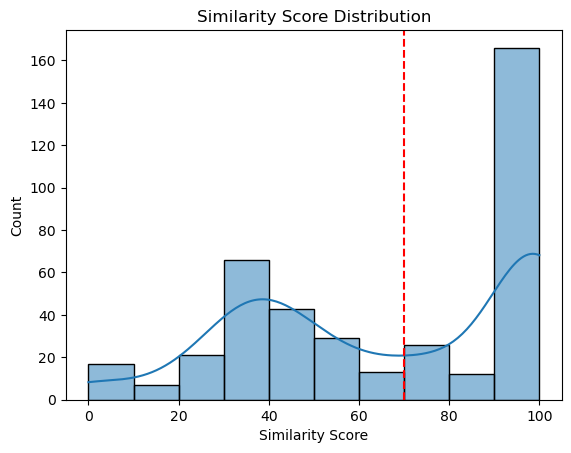

In [629]:
# 75 seems to be a good threshold for the similarity score

# make a smooth histogram
sns.histplot(prompts_df["similarity_score"], kde=True)
plt.xlabel("Similarity Score")
# mark at 75% similarity
plt.axvline(x=70, color='r', linestyle='--')
plt.ylabel("Count")
plt.title("Similarity Score Distribution")
plt.show()




In [630]:
# is_factually_correct = True if similarity_score > 70 else False

prompts_df["is_factually_correct"] = (prompts_df["similarity_score"] > 70)
prompts_df

,prompt,file_name,language,client,assignment_score,similarity_score,is_factually_correct
0,"Hi, I'm Finn Murphy with Tax Residency in Tur...",72K6TSQ829.wav,en,Finn Murphy,90,100.0,True
1,"Hi, this is Fatima Zara Mansuri, a tax reside...",O7O51MZU4N.wav,en,Fatima Zahra Mansouri,86,100.0,True
2,"Hello, Santiago Rivera here, born on 15th Apr...",1PSFC9GSK4.wav,en,Santiago Rivera,90,100.0,True
3,"Good morning, this is Olivia Tremblay with a ...",1JGXELMHOF.wav,en,Olivia Tremblay,90,89.0,True
4,"Hello, this is Isabella Rossi. Social Securit...",VXC2DB72R7.wav,en,Isabella Rossi,90,55.0,False
...,...,...,...,...,...,...,...
395,"Hello, this is Amina Corey, Account Number 07...",FPMY3OD663.wav,en,Amina Kouri,86,66.5,False
396,"Hello, I am Lara Bandenberg, account number Z...",TKWJHEYRLP.wav,sl,Lara van den Berg,86,100.0,True
397,"Hi, this is Fatima Zara Mansuri, account numb...",XATHQAOSPE.wav,en,Fatima Zahra Mansouri,86,46.5,False
398,"Good morning, I'm a Kyle Locke born on the 21...",FGQ1PL8LA6.wav,la,Kai Løkke,60,53.5,False


In [633]:
# check the predictions for the given real_recordings
real_recordings = pd.read_csv("../client_profiles/real_recordings.csv")

# chedk the results for the rec_id in the real_recordings which are the same as the file_name in the prompts_df, add .wav to the rec_id
real_recordings["rec_id"] = real_recordings["rec_id"].astype(str) + ".wav"
real_recordings["rec_id"]

# get the predictions for the real_recordings
prompts_df[prompts_df["file_name"].isin(real_recordings["rec_id"])]




,prompt,file_name,language,client,assignment_score,similarity_score,is_factually_correct
13,"Hello, this is Mia Anderson, a music producer...",Y6K2JU2H4B.wav,en,Mia Anderson,90,100.0,True
36,"Hello, this is Santiago Rivera. Account numbe...",H01FH3KEY8.wav,en,Santiago Rivera,90,100.0,True
56,"Hello, this is Olivia Trumblay, account numbe...",CBDX295MEZ.wav,en,Olivia Tremblay,86,100.0,True
60,"Hello, this is Sophia Almeida, account number...",ZCB53KC2PC.wav,en,Sofia Almeida,86,100.0,True
67,"Hello, this is Siyoyul Kin, an international ...",XKG8C7QFXT.wav,en,Seo-yun Kim,58,100.0,True
114,"Hello, this is Fin Marfi with a net worth of ...",ZGZHPG1TS8.wav,en,Finn Murphy,60,100.0,True
117,"Hello, this is Isabella Rossi. My relationshi...",2IM42LTT5R.wav,ms,Isabella Rossi,90,100.0,True
143,"Hello, this is Kai Lockhe, born on the 24th o...",244F8XZK0E.wav,en,Kai Løkke,86,100.0,True
144,"Hello, this is Hiroshi Nakamura. My account n...",ZBKI0P43EK.wav,ms,Hiroshi Nakamura,90,50.0,True
161,"Hello, this is Elias Venson, a tax resident o...",3162VQ31V7.wav,en,Elias Svensson,86,100.0,True


--> Error rate is around 2.5% when taking the given real_recordings as benchmark to check, all of them should be true

In [634]:
# correct the wrong is_factually_correct prediction for "ZBKI0P43EK.wav" to True
prompts_df.loc[prompts_df["file_name"] == "ZBKI0P43EK.wav", "is_factually_correct"] = True

prompts_df[prompts_df["file_name"].isin(real_recordings["rec_id"])]

,prompt,file_name,language,client,assignment_score,similarity_score,is_factually_correct
13,"Hello, this is Mia Anderson, a music producer...",Y6K2JU2H4B.wav,en,Mia Anderson,90,100.0,True
36,"Hello, this is Santiago Rivera. Account numbe...",H01FH3KEY8.wav,en,Santiago Rivera,90,100.0,True
56,"Hello, this is Olivia Trumblay, account numbe...",CBDX295MEZ.wav,en,Olivia Tremblay,86,100.0,True
60,"Hello, this is Sophia Almeida, account number...",ZCB53KC2PC.wav,en,Sofia Almeida,86,100.0,True
67,"Hello, this is Siyoyul Kin, an international ...",XKG8C7QFXT.wav,en,Seo-yun Kim,58,100.0,True
114,"Hello, this is Fin Marfi with a net worth of ...",ZGZHPG1TS8.wav,en,Finn Murphy,60,100.0,True
117,"Hello, this is Isabella Rossi. My relationshi...",2IM42LTT5R.wav,ms,Isabella Rossi,90,100.0,True
143,"Hello, this is Kai Lockhe, born on the 24th o...",244F8XZK0E.wav,en,Kai Løkke,86,100.0,True
144,"Hello, this is Hiroshi Nakamura. My account n...",ZBKI0P43EK.wav,ms,Hiroshi Nakamura,90,50.0,True
161,"Hello, this is Elias Venson, a tax resident o...",3162VQ31V7.wav,en,Elias Svensson,86,100.0,True


In [635]:
prompts_df.shape

(400, 7)

In [636]:
# save the prompts_df_final_predictions
prompts_df.to_csv("prompts_df_final_predictions.csv", index=False)


In [616]:
# for file_name in prompts_df["file_name"], use only the part before ".wav"ArithmeticError
# prompts_df["file_name"] = [file_name.split(".")[0] for file_name in prompts_df["file_name"]]

In [617]:
# count how often each client was matched
prompts_df["client"].value_counts()

client
Seo-yun Kim              22
Mia Anderson             22
Liam O'Brien             21
Anika Patel              21
Charlotte Leclerc        20
Sofia Almeida            20
Kai Løkke                20
Amina Kouri              20
Fatima Zahra Mansouri    20
Finn Murphy              20
Jorge Castillo           20
Olivia Tremblay          20
Santiago Rivera          20
Elias Svensson           20
Lara van den Berg        19
Noah Zimmerman           19
Elena Popova             19
Isabella Rossi           19
Hiroshi Nakamura         19
Chen Wei                 19
Name: count, dtype: int64